In [1]:
import pymaid
import navis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import scikit_posthocs as sp
from matplotlib.ticker import PercentFormatter

#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"<token>")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [2]:
#initialize an empty dataframe
glomcontrol=pd.DataFrame(columns=['glomerulus','id', 'path length in glom', 'total recurrent connections', 'recurrent connections in glom', 'recurrent connections density'])

In [3]:
#fetch a group of neurons
MD1OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD1neurons = pymaid.get_neuron(MD1OSNs)

Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
#get recurrent connectivity
for n in MD1neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets=MD1neurons)
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to='MD1 04/06/21')
    connect= list(connectivity.loc[int(n.id),:])
    sumconnect = sum(connect)
    glomconnect=list(glom_connectivity.loc[n.id,:])
    sumglomconnect=sum(glomconnect)

    #divide connectivity by length within glomerulus
#    control= sumglomconnect/dlength
    control= (sumglomconnect/dlength) * 1000 #WCL: to synapses/um from synapses/nm    
    glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)

453680.44


Regenerating:   0%|          | 0/10 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/2643253405.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


406781.8


Regenerating:   0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/2643253405.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


569447.6


Regenerating:   0%|          | 0/10 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/2643253405.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


445835.0


Regenerating:   0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/2643253405.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


506129.0


Regenerating:   0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/2643253405.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


391274.06


Regenerating:   0%|          | 0/10 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/2643253405.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


416095.0


Regenerating:   0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/2643253405.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


529873.44


Regenerating:   0%|          | 0/10 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/2643253405.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


284710.38


Regenerating:   0%|          | 0/10 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/2643253405.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


629597.1


Regenerating:   0%|          | 0/8 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/2643253405.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md1', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)


In [5]:
#fetch a group of neurons
MD2OSNs = pymaid.get_skids_by_annotation(['innervates MD2', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD2neurons = pymaid.get_neuron(MD2OSNs)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

In [6]:
#get recurrent connectivity
for n in MD2neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets=MD2neurons)
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to=MD2neurons)
    connect= list(connectivity.loc[int(n.id),:])
    sumconnect = sum(connect)
    glomconnect=list(glom_connectivity.loc[n.id,:])
    sumglomconnect=sum(glomconnect)

    #divide connectivity by length within glomerulus
    control= (sumglomconnect/dlength) * 1000 #WCL: to synapses/um from synapses/nm  
    glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


204651.9


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/193744631.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


141502.66


Regenerating:   0%|          | 0/5 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/193744631.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


138635.31


Regenerating:   0%|          | 0/5 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/193744631.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


152818.12


Regenerating:   0%|          | 0/3 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/193744631.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


167905.39


Regenerating:   0%|          | 0/5 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/193744631.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


140428.69


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/193744631.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


102887.84


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/193744631.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


195558.47


Regenerating:   0%|          | 0/4 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/193744631.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


164012.03


Regenerating:   0%|          | 0/8 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/193744631.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


167272.22


Regenerating:   0%|          | 0/4 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/193744631.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus': 'md2', 'id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)


In [7]:
#fetch a group of neurons
MD3OSNs = pymaid.get_skids_by_annotation(['innervates MD3', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD3neurons = pymaid.get_neuron(MD3OSNs)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

In [8]:
#get recurrent connectivity
for n in MD3neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets=MD3neurons)
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to=MD3neurons)
    connect= list(connectivity.loc[int(n.id),:])
    sumconnect = sum(connect)
    glomconnect=list(glom_connectivity.loc[n.id,:])
    sumglomconnect=sum(glomconnect)

    #divide connectivity by length within glomerulus
    control= (sumglomconnect/dlength) * 1000 #WCL: to synapses/um from synapses/nm  
    glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


170986.03


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/3747562617.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


150195.02


Regenerating:   0%|          | 0/9 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/3747562617.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


156733.62


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/3747562617.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


188369.72


Regenerating:   0%|          | 0/8 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/3747562617.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


133558.53


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/3747562617.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


138479.78


Regenerating:   0%|          | 0/4 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/3747562617.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


108313.91


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/3747562617.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


144739.16


Regenerating:   0%|          | 0/6 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/3747562617.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


107448.98


Regenerating:   0%|          | 0/8 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/3747562617.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


123889.95


Regenerating:   0%|          | 0/7 [00:00<?, ?it/s]

/var/folders/bs/bt3x67kj3zs_156m1s0x72r40000gp/T/ipykernel_52336/3747562617.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  glomcontrol=glomcontrol.append({'glomerulus':'md3','id':int(n.id),'path length in glom':dlength, 'total recurrent connections':sumconnect, 'recurrent connections in glom':sumglomconnect, 'recurrent connections density':control}, ignore_index=True)


In [9]:
df=glomcontrol
df

,glomerulus,id,path length in glom,total recurrent connections,recurrent connections in glom,recurrent connections density
0,md1,7172,453680.4375,93,93.0,0.20499
1,md1,7815,406781.8125,51,51.0,0.125374
2,md1,873,569447.625,68,67.0,0.117658
3,md1,6736,445835.0,56,55.0,0.123364
4,md1,881,506129.0,74,71.0,0.14028
5,md1,6975,391274.0625,82,82.0,0.209572
6,md1,324409,416095.0,77,77.0,0.185054
7,md1,953,529873.4375,71,67.0,0.126445
8,md1,5021,284710.375,41,40.0,0.140494
9,md1,671,629597.125,77,71.0,0.112771


In [10]:
md1=df[df["glomerulus"]=="md1"]
md2=df[df["glomerulus"]=="md2"]
md3=df[df['glomerulus']=="md3"]
#md1.head()

,glomerulus,id,path length in glom,total recurrent connections,recurrent connections in glom,recurrent connections density
0,md1,7172,453680.4375,93,93.0,0.20499
1,md1,7815,406781.8125,51,51.0,0.125374
2,md1,873,569447.625,68,67.0,0.117658
3,md1,6736,445835.0,56,55.0,0.123364
4,md1,881,506129.0,74,71.0,0.14028


In [11]:
#make synapse number lists
md1_recurrent_inglom=md1["recurrent connections in glom"].values.tolist()
#md1_recurrent_inglom_total=list(np.concatenate(md1_recurrent_inglom))

md2_recurrent_inglom=md2["recurrent connections in glom"].values.tolist()
#md2_recurrent_inglom=list(np.concatenate(md2_recurrent_inglom))

md3_recurrent_inglom=md3["recurrent connections in glom"].values.tolist()
#md3_recurrent_inglom=list(np.concatenate(md3_recurrent_inglom))

print(md1_recurrent_inglom)

[93.0, 51.0, 67.0, 55.0, 71.0, 82.0, 77.0, 67.0, 40.0, 71.0]


In [12]:
#make dataframe for plotting

data_dict = {"1": md1_recurrent_inglom, "2": md2_recurrent_inglom, "3": md3_recurrent_inglom}
pre_df = {"Glomerulus": [], "OSN → OSN synapses in glomerulus": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → OSN synapses in glomerulus"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN → OSN synapses in glomerulus
0,1,93.0
1,1,51.0
2,1,67.0
3,1,55.0
4,1,71.0
5,1,82.0
6,1,77.0
7,1,67.0
8,1,40.0
9,1,71.0


In [13]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["violet", "#0000FF", 'mediumspringgreen']
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.


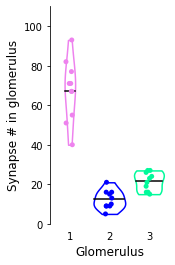

In [14]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "OSN → OSN synapses in glomerulus"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('Synapse # in glomerulus', size=12, fontname="Liberation Sans")
ax.set_aspect(0.05)
plt.ylim(0,110)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)

plt.savefig('../svg/recurrent_inglom.svg', format="svg")
plt.show()

In [15]:
stats.kruskal(md1_recurrent_inglom, md2_recurrent_inglom, md3_recurrent_inglom)

KruskalResult(statistic=23.793476318141206, pvalue=6.812590190632616e-06)

In [16]:
sp.posthoc_dunn([md1_recurrent_inglom, md2_recurrent_inglom, md3_recurrent_inglom], p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.000003,0.016587
2,0.000003,1.000000,0.110605
3,0.016587,0.110605,1.000000


In [17]:
#make density lists

md1_recurrent_density=md1["recurrent connections density"].values.tolist()
md2_recurrent_density=md2["recurrent connections density"].values.tolist()
md3_recurrent_density=md3["recurrent connections density"].values.tolist()

In [18]:
#make dataframe for plotting

data_dict = {"1": md1_recurrent_density, "2": md2_recurrent_density, "3": md3_recurrent_density}
pre_df = {"Glomerulus": [], "OSN → OSN synapses density (synapses/µm)": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → OSN synapses density (synapses/µm)"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN → OSN synapses density (synapses/µm)
0,1,0.204990
1,1,0.125374
2,1,0.117658
3,1,0.123364
4,1,0.140280
5,1,0.209572
6,1,0.185054
7,1,0.126445
8,1,0.140494
9,1,0.112771


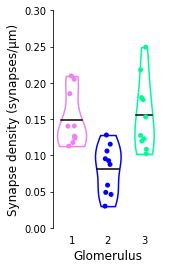

In [19]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "OSN → OSN synapses density (synapses/µm)"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('Synapse density (synapses/µm)', size=12, fontname="Liberation Sans")
ax.set_aspect(20)
plt.ylim(0,0.3)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)

plt.savefig('../svg/recurrentdensity.svg', format="svg")
plt.show()

In [20]:
stats.kruskal(md1_recurrent_density, md2_recurrent_density, md3_recurrent_density)

KruskalResult(statistic=14.31741935483872, pvalue=0.0007780578514039379)

In [21]:
sp.posthoc_dunn([md1_recurrent_density, md2_recurrent_density, md3_recurrent_density], p_adjust = 'bonferroni')

,1,2,3
1,1.00000,0.002880,1.000000
2,0.00288,1.000000,0.003448
3,1.00000,0.003448,1.000000
